In [116]:
import numpy as np
import matplotlib.pyplot as plt


In [117]:
# Read data 
data = np.load('data/np_data.npy')
data.shape

(15315, 3200)

In [118]:
num_shots = 3
receivers_per_line = 638 
num_lines = 8 

source_idx = np.array([(receivers_per_line *num_lines)*i + i for i in range(num_shots +1)])
source_idx = np.concatenate((np.array([-1]),source_idx))

# get time stamps 
def get_time(data,delta_t=2*1e-3):
    return np.arange(data.shape[1])*delta_t

def get_source_signal(shot_no,data=data):
    return data[source_idx[shot_no]]

# this returns the signals from given shot and line 
def get_receivers_data(shot_no,line_no,data=data):
    signal = data[source_idx[shot_no]+1:source_idx[shot_no +1]] # select the data from given shot
    line_signals = np.split(signal,num_lines,axis=0)            # split the array into num of lines 
    return np.array(line_signals[line_no-1])                    # and select the line

In [119]:
# source signal at shot 1 
source_1_signal = get_source_signal(2)
shot1_line1_signals = get_receivers_data(1,1)

In [120]:
# this return freq and psd of a signal 
def get_freq(signal,t_min=None,t_max=None,delta_t=2e-3,scaled_ss=False):
    ss = signal   
    n = len(ss) 
    time = np.arange(n)*delta_t
    
    if t_max is not None  and t_min is not None:
        time_mask = (time < t_max)*(time >t_min)
        ss = ss*time_mask
        
    f_ss = np.fft.fft(ss)            
    psd = np.sqrt(f_ss * np.conj(f_ss) /n) 
    

    if max(abs(psd))  !=0:
        max_psd = max(abs(psd)) 
        psd = psd/max_psd
    
    freq = np.fft.fftfreq(n)/delta_t        
    pos_freq = np.real(freq[freq>=0])
    pos_psd = np.real(psd[freq>=0])
    
    return np.array([pos_freq,pos_psd]).T

[0.  0.1 0.2 0.3 0.4]


[[<matplotlib.lines.Line2D at 0x7f021c2645e0>],

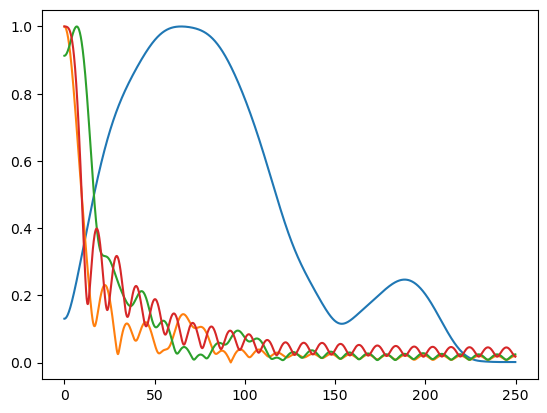

In [127]:
time = get_time(data)
time = time[::50]
time = time[0:5]
print(time)
#time = time[:20]
freq_t = np.array([get_freq(source_1_signal,t_min,t_max) for t_min, t_max in zip(time[:-1],time[1:])])
[plt.plot(freq_t[t,:,0],freq_t[t,:,1]) for t in range(len(time)-1) ]

[1.4 1.5 1.6 1.7 1.8 1.9]


[[<matplotlib.lines.Line2D at 0x7f01f8563eb0>],

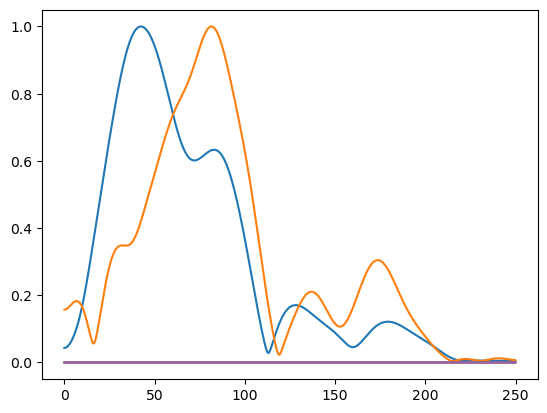

In [143]:
time = get_time(data)
time = time[::50]
time = time[14:20]
print(time)
#time = time[:20]
freq_t = np.array([get_freq(shot1_line1_signals[10],t_min,t_max) for t_min, t_max in zip(time[:-1],time[1:])])
[plt.plot(freq_t[t,:,0],freq_t[t,:,1]) for t in range(len(time)-1) ]